In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
data = pd.read_csv('Tokyo2021.csv')

In [3]:
data.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


In [4]:
data.tail()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA
92,86,Syrian Arab Republic,0,0,1,1,77,SYR


In [5]:
data.describe()

,Rank,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


In [6]:
count = data.groupby(['Gold Medal','Total'])['Gold Medal'].count()
count

Gold Medal  Total
0           1        14
            2         4
            3         3
            4         3
            5         2
            7         1
            8         1
1           1         3
            2         5
            3         1
            4         6
            5         1
            6         2
            7         3
            19        1
2           2         2
            3         2
            4         4
            8         1
            12        1
            13        1
3           5         2
            6         1
            7         2
            8         1
            9         2
            11        1
            13        1
            17        1
4           8         1
            9         1
            10        1
            11        1
            14        1
6           20        2
7           15        1
            20        1
            21        1
            24        1
10          33        1
            36        

In [7]:
data.shape

(93, 8)

In [8]:
data.columns

Index(['Rank', 'Team/NOC', 'Gold Medal', 'Silver Medal', 'Bronze Medal',
       'Total', 'Rank by Total', 'NOCCode'],
      dtype='object')

In [9]:
data.nunique()

Rank             67
Team/NOC         93
Gold Medal       14
Silver Medal     17
Bronze Medal     21
Total            30
Rank by Total    30
NOCCode          93
dtype: int64

In [10]:
#Checking Missing Values
data.isnull().sum()

Rank             0
Team/NOC         0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank by Total    0
NOCCode          0
dtype: int64

In [11]:
#Handling missing Values
my_data = data.fillna(method = 'bfill', axis = 0).fillna(0)
my_data

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77,GHA
89,86,Grenada,0,0,1,1,77,GRN
90,86,Kuwait,0,0,1,1,77,KUW
91,86,Republic of Moldova,0,0,1,1,77,MDA


In [12]:
data['Total'].head(80)

0     113
1      88
2      58
3      65
4      71
     ... 
75      2
76      1
77      1
78      1
79      1
Name: Total, Length: 80, dtype: int64

In [13]:
data['Rank by Total'].head(80)

0      1
1      2
2      5
3      4
4      3
      ..
75    66
76    77
77    77
78    77
79    77
Name: Rank by Total, Length: 80, dtype: int64

In [14]:
data.head(86)

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC
...,...,...,...,...,...,...,...,...
81,77,Turkmenistan,0,1,0,1,77,TKM
82,83,Kazakhstan,0,0,8,8,29,KAZ
83,84,Mexico,0,0,4,4,47,MEX
84,85,Finland,0,0,2,2,66,FIN


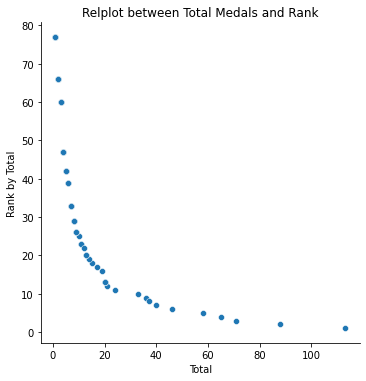

In [15]:
sns.relplot(data = data, x = "Total", y = "Rank by Total")
plt.title("Relplot between Total Medals and Rank")
plt.show()

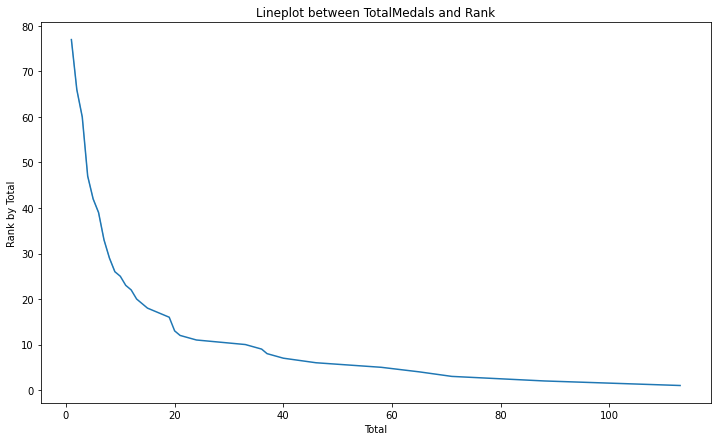

In [16]:
plt.figure(figsize = (12,7))
sns.lineplot(data = data, x = "Total", y ="Rank by Total")
plt.title("Lineplot between TotalMedals and Rank")
plt.show()

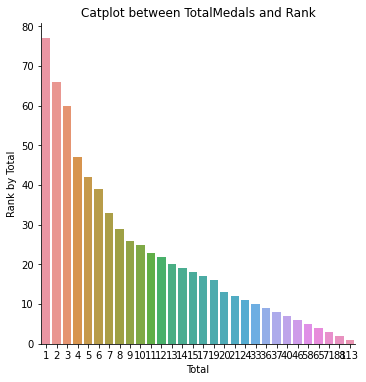

In [17]:
sns.catplot(data = data, kind='bar', x = 'Total',y = 'Rank by Total')
plt.title("Catplot between TotalMedals and Rank")
plt.show()

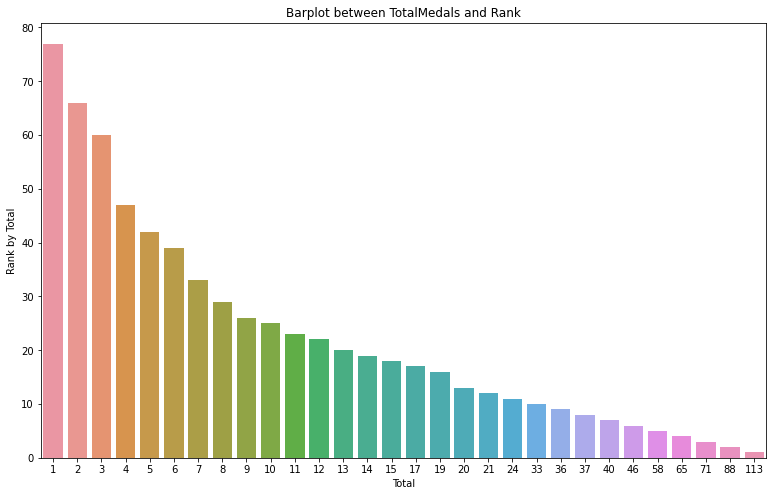

In [18]:
plt.figure(figsize = (13,8))
sns.barplot(data = data , x = 'Total', y = 'Rank by Total')
plt.title("Barplot between TotalMedals and Rank")
plt.show()

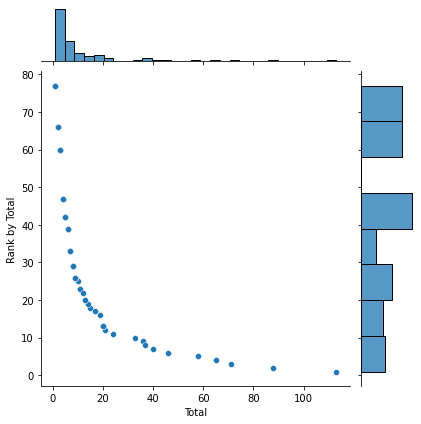

In [19]:
sns.jointplot(data = data,x='Total',y='Rank by Total')
plt.show()